<a href="https://colab.research.google.com/github/markqle/telecomchurning/blob/main/TelecomChurning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CRISP-DM Process

**Business Understanding**

§ Briefly describe the business context of customer churn in general and for
telecommunication industry in particular; define the customer churn
problem based on your understanding.



1.   Customer churn is the rate where customer stop using business services over a specific timeframe.
2. In the telecom industry, a business with high churn rate means customers are leaving their services and going to open new business with competitors.
3. This indicates there are problems with the telecom products, services (area coverage, customer services) of the business. The objectives of the business is to minimize the churn rate to retain the customer for long term. They can do it by targeting those customers or clients and provides them with special incentives, offerings, and plans to retain the business.



**Data Understanding**

In [4]:
#Read data
df = pd.read_csv('/content/drive/MyDrive/IS675_data/CustomerChurnData.csv')

In [5]:
df.head()

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N


In [6]:
df['gender'].value_counts()

,count
gender,
Y,502
N,498


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cust_id   1000 non-null   object 
 1   region    1000 non-null   object 
 2   tenure    1000 non-null   int64  
 3   age       1000 non-null   int64  
 4   marital   1000 non-null   object 
 5   address   1000 non-null   int64  
 6   income    1000 non-null   int64  
 7   ed        1000 non-null   object 
 8   employ    1000 non-null   int64  
 9   retire    1000 non-null   object 
 10  gender    1000 non-null   object 
 11  reside    1000 non-null   int64  
 12  tollfree  1000 non-null   object 
 13  equip     1000 non-null   object 
 14  callcard  1000 non-null   object 
 15  wireless  1000 non-null   object 
 16  longmon   1000 non-null   float64
 17  tollmon   1000 non-null   float64
 18  equipmon  1000 non-null   float64
 19  cardmon   1000 non-null   float64
 20  wiremon   1000 non-null   float

*Explain each variable*


1. cust_id: Customer unique Id
2. region: coded region the customer reside
3. tenure: number of month customers have stayed with the business
4. age: customer age
5. marital: customer marriage status
6. address: customer residential/business address
7. income: customer income amount
8. ed: coded education level
9. retire: whether customers have retired or not
10. gender: customer gender
11. reside: customer demographic location
12. tollfree: whether it is free to call the customer
13. equip: whether customer has this company equipment plan / lease
14. callcard: whether customer uses callcard services
15. wireless: whether customer uses wireless/mobile service with the company
16. longmon: average monthly long distance call charge
17. tollten: toll free call over last 10 months
18. equipmon: average monthly equipment charge
19. callmon: average monthly callcard charge
20. wiremon: average monthly wireless services charge
21. longten: long distance call charge over last 10 months
22. tollten: toll free call over last 10 months
23. equipten: equipment charge over last 10 months
24. cardten: calling card activity over last 10 months
25. wireten: wireless services charge over last 10 months
26. multline: whether customers have multiple lines
27. voice: whether customers have voicemail services
28. pager: whether customers have pager services
29. internet: whether customers have internet services
30. callid: whether customers have caller id services
31. callwait: whether customers have call waiting services
32. forward: whether customers have call forwarding services
33. confer: whether customers have conference call services (connect more than 3 persons)
34. ebill: whether customers have registered electronic bills.
35. loglong: Log transform of long-distance usage/charges (used to reduce skew)
36. lninc: Log transform of income (e.g., log(1 + income)), to reduce skew
37. custcat: customer categories
38. churn: whether the customer left the company


*How these variables relating to the dataset*
1. These variables explain the context of the customers, socio-demographic of this company customer, employment (stability)
2. The commitment with the company (e.g. tenure, ebill)
3. Product bundles: if the customer have these features multline, voice, callid, callwait, forward, confer, internet, wireless. These are bundle features, the more they have the longer the customer will stay.
4. Usage behavior: ongmon, tollmon, equipmon, cardmon, wiremon, if the customers have very low usage, disengagement risk (“I don’t use it; why pay?”). ongten, tollten, equipten, cardten, wireten are 10-month totals, show the sustainable pattern.

In [8]:
#EDA
# convert yes / no to 0,1
yn_cols = ["marital","tollfree","equip","callcard","wireless","multline","voice","pager",
           "internet","callid","callwait","forward","confer","ebill","retire","churn"]
df[yn_cols] = (df[yn_cols] == "Y").astype("Int8")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cust_id   1000 non-null   object 
 1   region    1000 non-null   object 
 2   tenure    1000 non-null   int64  
 3   age       1000 non-null   int64  
 4   marital   1000 non-null   Int8   
 5   address   1000 non-null   int64  
 6   income    1000 non-null   int64  
 7   ed        1000 non-null   object 
 8   employ    1000 non-null   int64  
 9   retire    1000 non-null   Int8   
 10  gender    1000 non-null   object 
 11  reside    1000 non-null   int64  
 12  tollfree  1000 non-null   Int8   
 13  equip     1000 non-null   Int8   
 14  callcard  1000 non-null   Int8   
 15  wireless  1000 non-null   Int8   
 16  longmon   1000 non-null   float64
 17  tollmon   1000 non-null   float64
 18  equipmon  1000 non-null   float64
 19  cardmon   1000 non-null   float64
 20  wiremon   1000 non-null   float

In [10]:
rate = df.groupby("region", as_index=False)["churn"].mean()
rate["churn_pct"] = rate["churn"] * 100

In [11]:
rate

,region,churn,churn_pct
0,R1,0.259494,25.949367
1,R2,0.289941,28.994083
2,R3,0.225434,22.543353


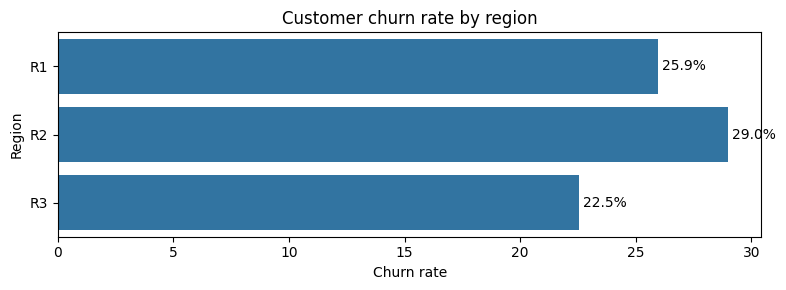

In [12]:
plt.figure(figsize=(8, 3))
ax = sns.barplot(data=rate, y="region", x="churn_pct")
ax.set_xlabel("Churn rate")
ax.set_ylabel("Region")
ax.set_title("Customer churn rate by region")
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", padding=3)

plt.tight_layout()
plt.show()

-> We can see the Region (R2) contain the highest churning rate.

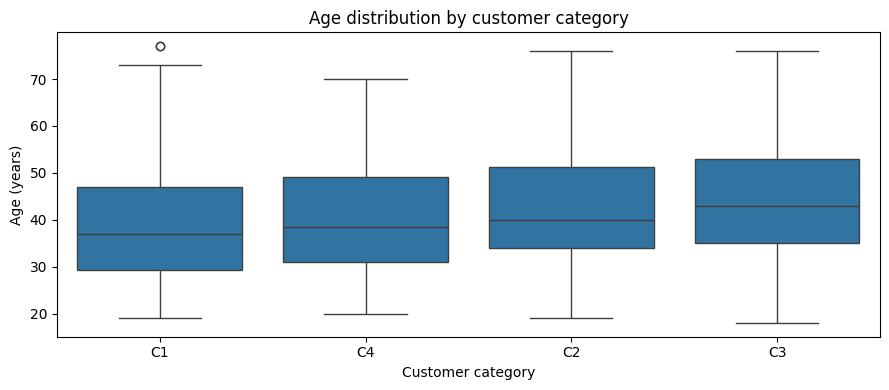

In [13]:
# order categories by median age
order = (df.groupby('custcat')['age']
           .median()
           .sort_values()
           .index)

plt.figure(figsize=(9,4))
ax = sns.boxplot(data=df, x='custcat', y='age', order=order)
ax.set_title('Age distribution by customer category')
ax.set_xlabel('Customer category')
ax.set_ylabel('Age (years)')
plt.tight_layout()
plt.show()

-> This tell the distribution of age in the customer category, with C3 has the highest median in age, while C1 is lowest median in age

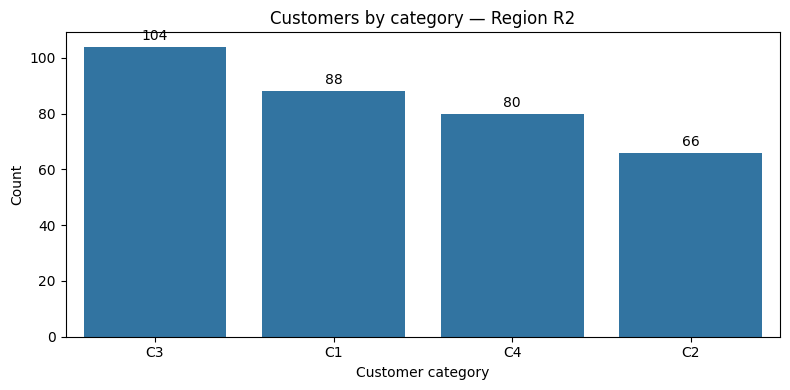

In [14]:
#Check Customer Category Distribution in Region R2
sub = df.loc[df['region'] == 'R2'].copy()
order = sub['custcat'].value_counts().index
plt.figure(figsize=(8,4))
ax = sns.countplot(data=sub, x='custcat', order=order)
ax.set_title('Customers by category — Region R2')
ax.set_xlabel('Customer category');
ax.set_ylabel('Count')

# add count labels
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}',
                (bar.get_x() + bar.get_width()/2, bar.get_height()),
                ha='center', va='bottom', xytext=(0,3), textcoords='offset points')
plt.tight_layout();
plt.show()


-> This tell us that in Region R2 where it has the highest churn rate, the customer group C3 (which has highest median age) is the largest here

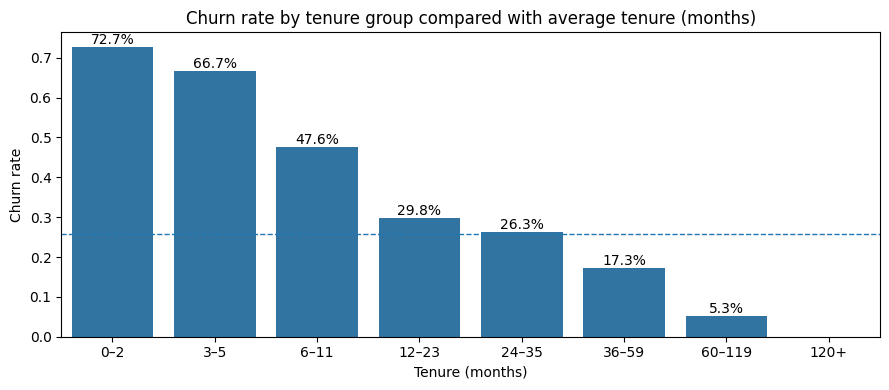

In [15]:
#Churn rate by TENURE (how long they stay with the company service)
# Break the tenures in EVERY 3 months
fixed_edges = [0, 3, 6, 12, 24, 36, 60, 120]
last_edge = max(121, int(df["tenure"].max()) + 1)  # ensure strictly > 120
bins = fixed_edges + [last_edge]
labels = ["0–2","3–5","6–11","12–23","24–35","36–59","60–119","120+"]

#Cut convert tenure from numerical into categorical
df["tenure_band"] = pd.cut(
    df["tenure"], bins=bins, labels=labels, right=False, include_lowest=True
)

# Overall average churn. This will help me later draw the average line
overall = df["churn"].mean()

#Calculate the mean of churn in each tenure group
rate = df.groupby("tenure_band", as_index=False, observed=True)["churn"].mean()

#Draw bar chart
plt.figure(figsize=(9,4))
ax = sns.barplot(data=rate, x="tenure_band", y="churn")

# average line
ax.axhline(overall, linestyle="--", linewidth=1, label=f"Overall avg ({overall:.1%})")

ax.set_xlabel("Tenure (months)")
ax.set_ylabel("Churn rate")
ax.set_title("Churn rate by tenure group compared with average tenure (months)")
for c in ax.containers:
    ax.bar_label(c, labels=[f"{v*100:.1f}%" for v in c.datavalues])
plt.tight_layout();
plt.show()

-> This shows the commitment of customer from 0 to 5 months, they have 66.7- 72.7% tendency to churn, highest among tenure group. The longer the customers with the services the less they are likely to churn.

/tmp/ipython-input-3836024097.py:23: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("n_yes >= @min_count")


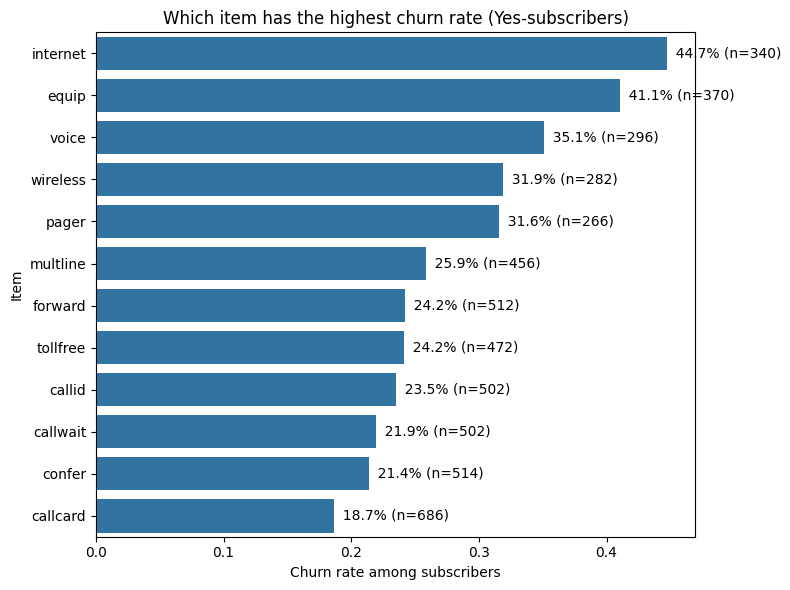

In [16]:
service_cols = [
    "internet","wireless","multline","voice","callid","callwait",
    "forward","confer","tollfree","callcard","equip","pager"
]

# 1) Subscribers per item (count of 1s)
n_yes = df[service_cols].sum(axis=0)

# 2) Churners among subscribers of each item
#    (multiply each service column by churn, row-wise, then sum)
churn_yes = df[service_cols].mul(df["churn"], axis=0).sum(axis=0)

# 3) Churn rate among subscribers of each item
rate_yes = (churn_yes / n_yes).replace([float("inf")], pd.NA).fillna(0)

# 4) Assemble table (optionally filter tiny items)
min_count = 15
stats = (pd.DataFrame({
            "item": rate_yes.index,
            "churn_rate": rate_yes.values,
            "n_yes": n_yes.values
        })
        .query("n_yes >= @min_count")
        .sort_values("churn_rate", ascending=False))

# 5) Plot
plt.figure(figsize=(8, 0.5*len(stats)))
ax = sns.barplot(data=stats, y="item", x="churn_rate")
ax.set_xlabel("Churn rate among subscribers")
ax.set_ylabel("Item")
ax.set_title("Which item has the highest churn rate (Yes-subscribers)")

for i, (r, n) in enumerate(zip(stats["churn_rate"], stats["n_yes"])):
    ax.text(r, i, f"  {r*100:.1f}% (n={n})", va="center")

plt.tight_layout();
plt.show()


-> Internet service has highest churn rate

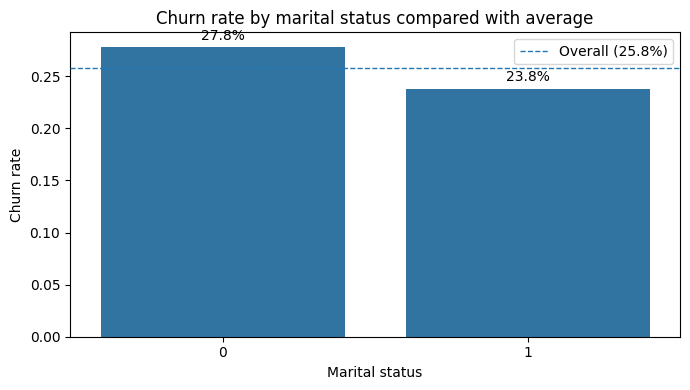

In [17]:
#Marital status and churn (if someone have family, whether they are easy to churn ?)
rate = df.groupby("marital", as_index=False)["churn"].mean()
order = rate.sort_values("churn", ascending=False)["marital"]
overall = df["churn"].mean()
plt.figure(figsize=(7,4))
ax = sns.barplot(data=rate, x="marital", y="churn", order=order)
ax.axhline(overall, ls="--", lw=1, zorder=10, label=f"Overall ({overall:.1%})")
ax.set_xlabel("Marital status"); ax.set_ylabel("Churn rate"); ax.set_title("Churn rate by marital status compared with average")
for c in ax.containers:
    ax.bar_label(c, labels=[f"{v*100:.1f}%" for v in c.datavalues], padding=3)
ax.legend()
plt.tight_layout();
plt.show()

-> People who are married is less likely to churn

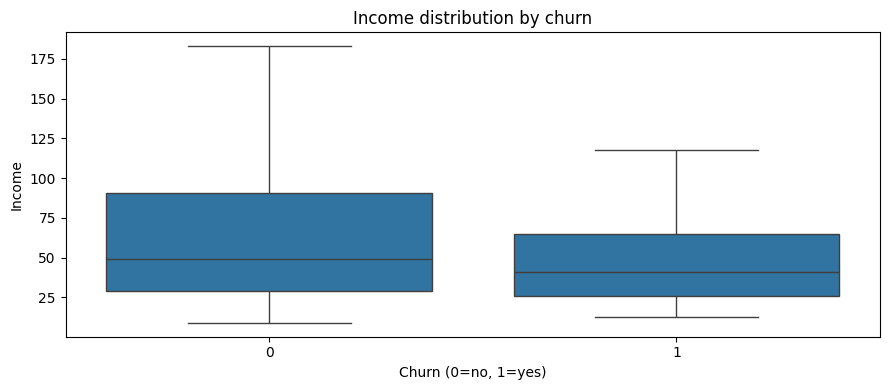

In [18]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(data=df, x="churn", y="income", showfliers=False)
ax.set_xlabel("Churn (0=no, 1=yes)")
ax.set_ylabel("Income")
ax.set_title("Income distribution by churn")
plt.tight_layout(); plt.show()

/tmp/ipython-input-2846743989.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_log = df.groupby("income_q", as_index=False)["churn"].mean()


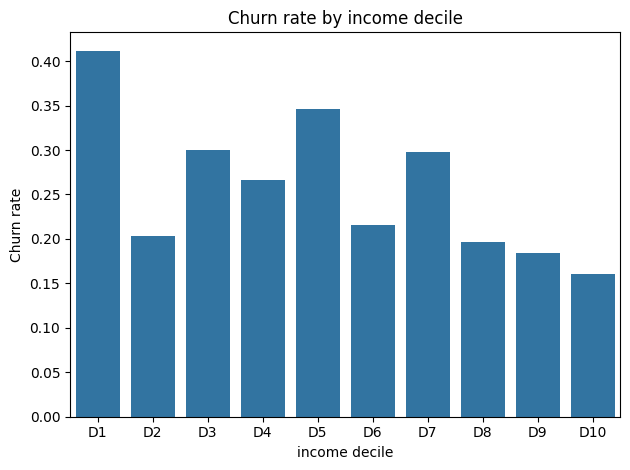

In [19]:
df["income_q"] = pd.qcut(df["income"], q=10, labels=[f"D{i}" for i in range(1,11)], duplicates="drop")
rate_log = df.groupby("income_q", as_index=False)["churn"].mean()

sns.barplot(data=rate_log, x="income_q", y="churn")
plt.xlabel("income decile");
plt.ylabel("Churn rate");
plt.title("Churn rate by income decile")
plt.tight_layout();
plt.show()

-> people with income group D1 (lowest income group) has the highest churn rate, then the middle class income group

/tmp/ipython-input-532302165.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_age = df.groupby(["age_band","retire"], as_index=False)["churn"].mean()


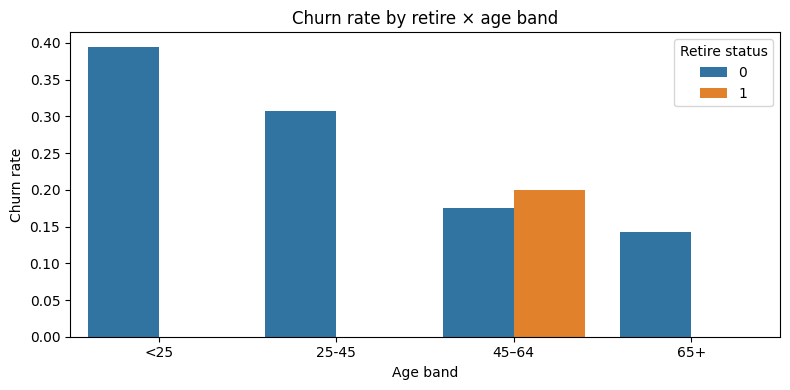

In [20]:
bins   = [0,25,45,65,200]
labels = ["<25","25-45","45–64","65+"]

df["age_band"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
rate_age = df.groupby(["age_band","retire"], as_index=False)["churn"].mean()

plt.figure(figsize=(8,4))
ax = sns.barplot(data=rate_age, x="age_band", y="churn", hue="retire")
ax.set_xlabel("Age band");
ax.set_ylabel("Churn rate");
ax.set_title("Churn rate by retire × age band")
plt.legend(title="Retire status")
plt.tight_layout();
plt.show()

-> Churn rate is highest among people who has not retire and <25 year old

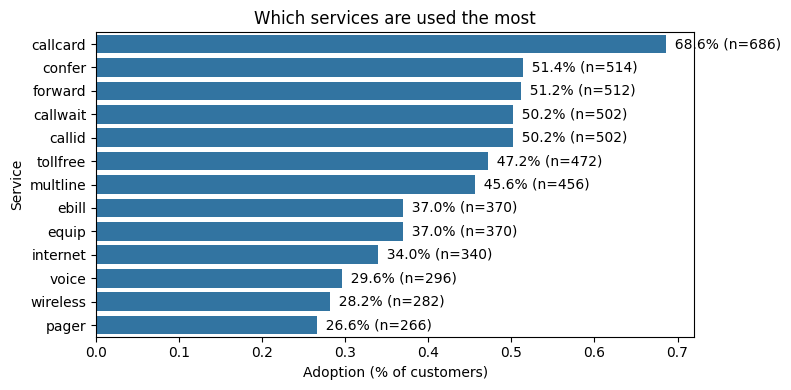

In [25]:
service_cols = [
    "internet","wireless","multline","voice","callid","callwait",
    "forward","confer","tollfree","callcard","equip","pager","ebill"
]

adopt = (df[service_cols].sum(axis=0)
           .sort_values(ascending=False)
           .rename_axis("service")
           .reset_index(name="n_yes"))
adopt["pct"] = adopt["n_yes"] / len(df)

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=adopt, y="service", x="pct")
ax.set_xlabel("Adoption (% of customers)")
ax.set_ylabel("Service")
ax.set_title("Which services are used the most")

# add labels: “xx.x% (n=…)”
for i, (p, n) in enumerate(zip(adopt["pct"], adopt["n_yes"])):
    ax.text(p, i, f"  {p*100:.1f}% (n={n})", va="center")

plt.tight_layout();
plt.show()


-> Callcard is the service used the most by customer, pager is the least